## I'm looking forward to your high evaluation!
## If you have any suggestions for improvement, please comment!

A dataset comprising the price, address, number of bathrooms, number of bedrooms, city, and province of real estate listings for Canada's top 45 most populous cities, according to the 2021 census.
This dataset is **35768 rows and 10 columns**.

### Click <a href="#feature">**HERE**</a> for details on each variable

# Features

|Feature|Example|D-type|Null-Count|
|----|----|----|----|
|City|Toronto|object|0|
|Price|779900.0|float64|0|
|Address|#318 -20 SOUTHPORT ST|object|0|
|Number_Beds|3|int64|0|
|Number_Baths|2|int64|0|
|Province|Ontario|object|0|
|Population|5647656|int64|0|
|Latitude|43.7417|float64|0|
|Longitude|-79.3733|float64|0|
|Median_Family_Income|97000.0|float64|0|

In [1]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/canadian-house-prices-for-top-cities/HouseListings-Top45Cities-10292023-kaggle.csv",encoding="latin1")
print(df.shape)
df.head(3)

(35768, 10)


,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0


# Data details

In [3]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
df = df[df["Number_Beds"]<100]

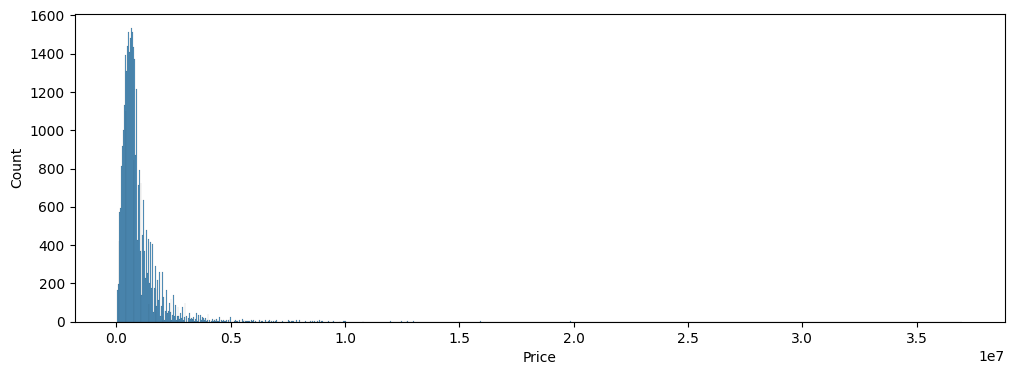

In [6]:
plt.figure(figsize=(12,4))
sns.histplot(df["Price"])
plt.show()

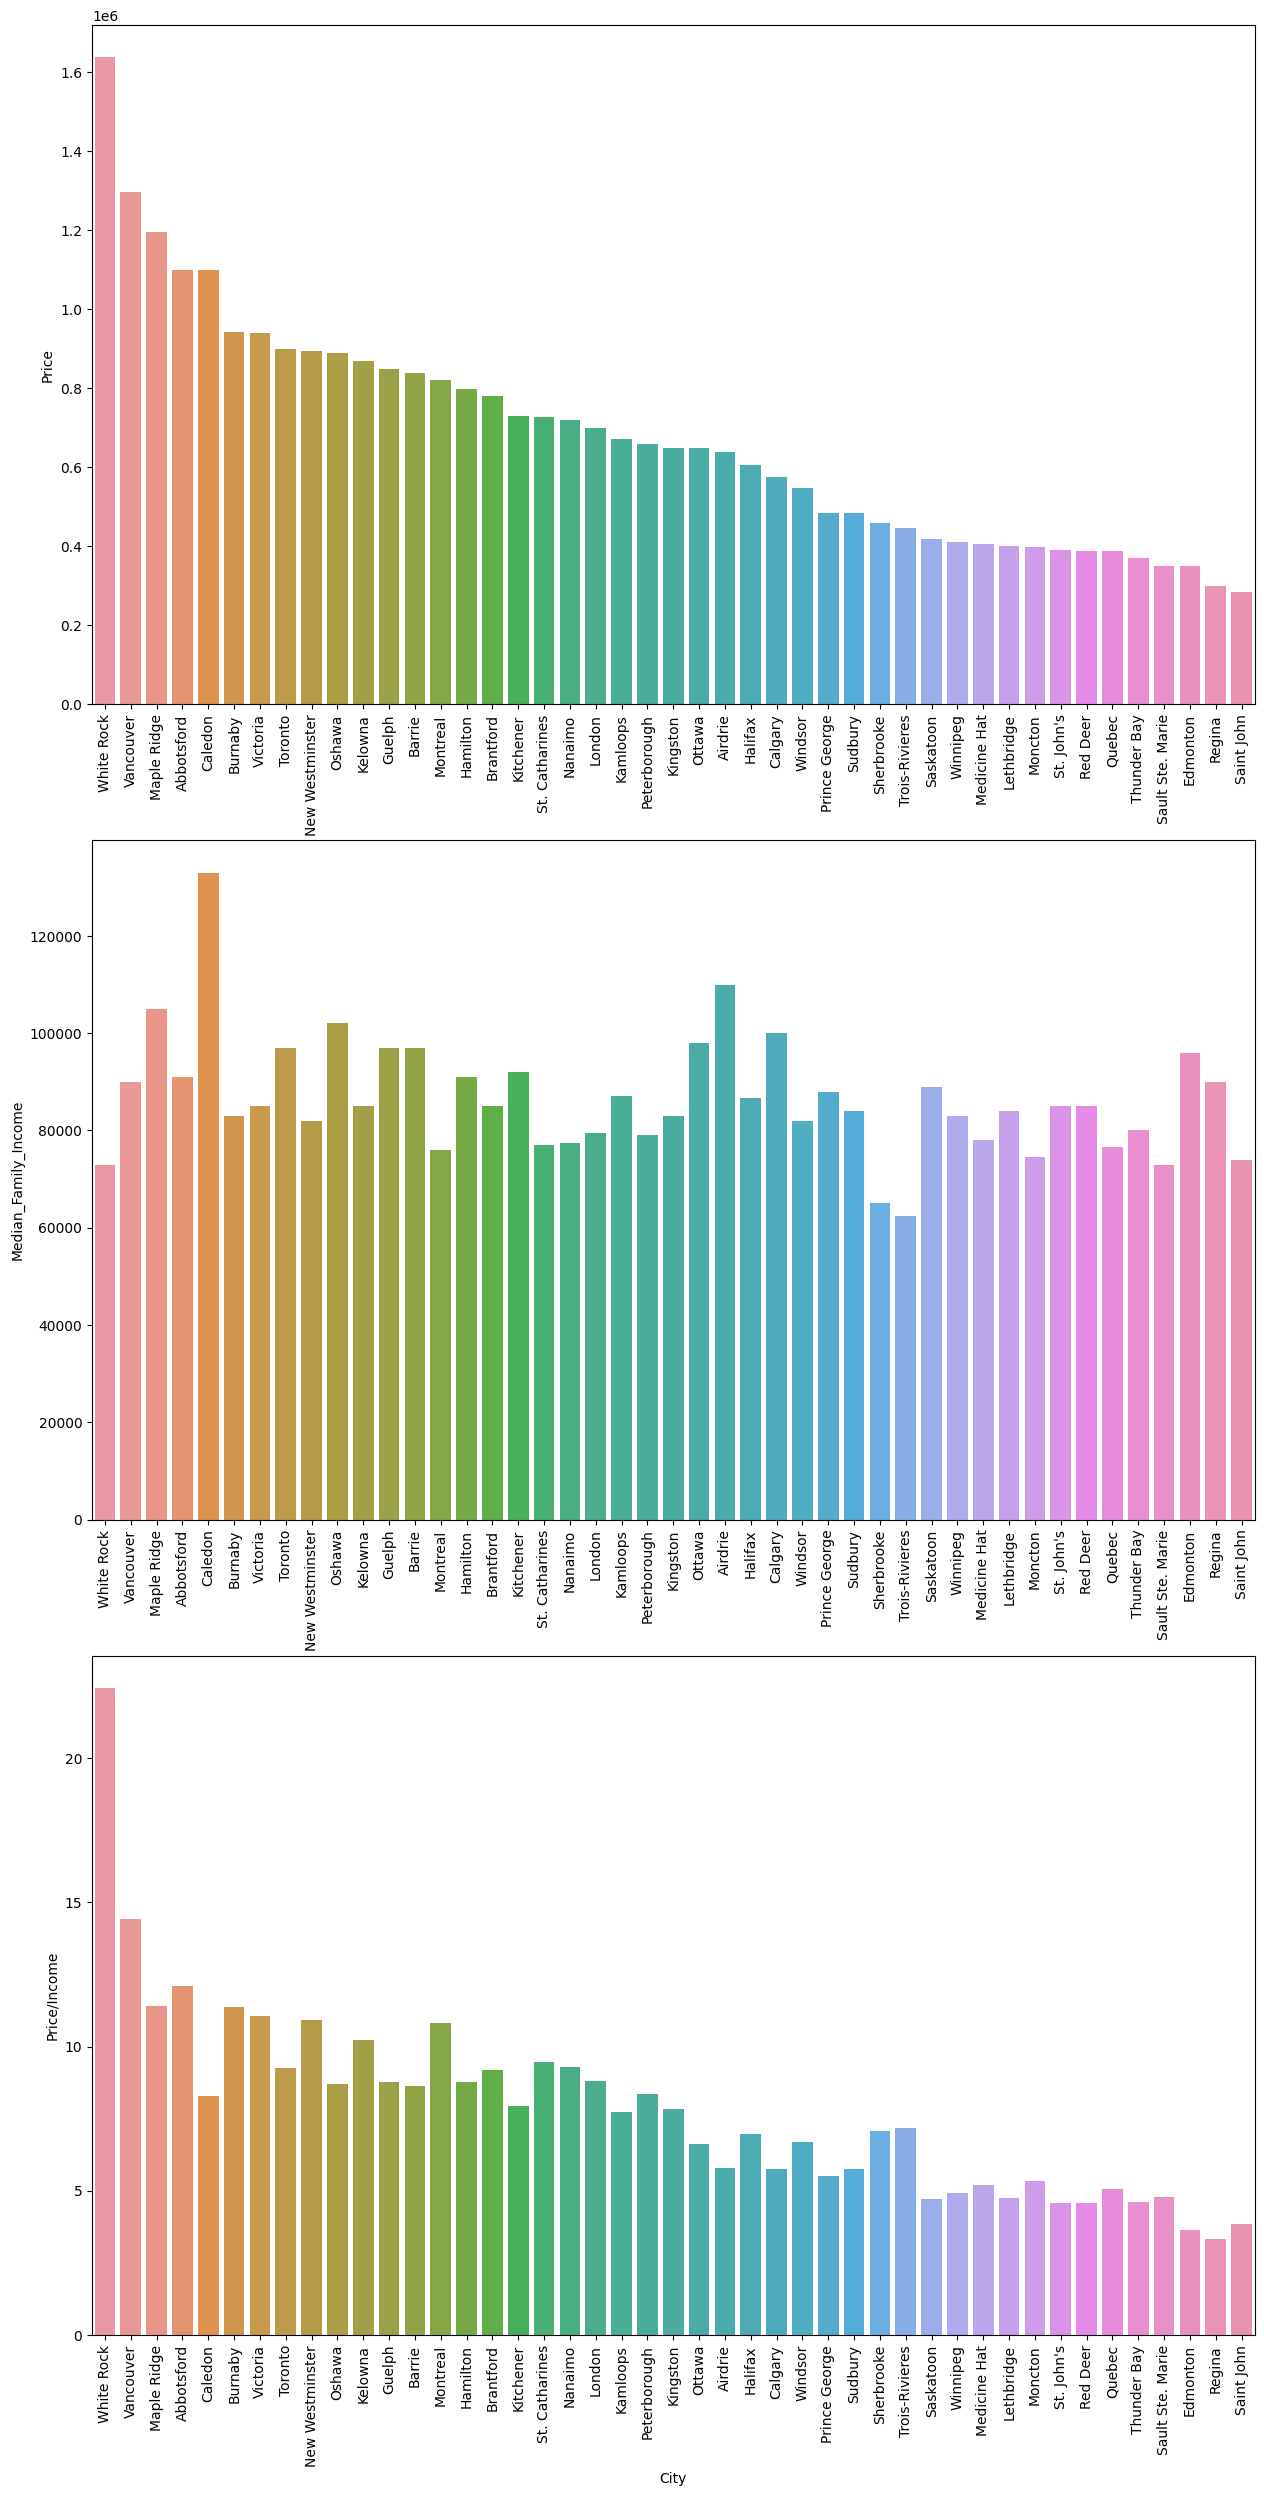

In [7]:
tmp_df = df.groupby("City").agg({"Price":"median","Median_Family_Income":"mean"}).sort_values("Price",ascending=False)
plt.figure(figsize=(15,30))

plt.subplot(311)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Price"])

plt.subplot(312)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Median_Family_Income"])

plt.subplot(313)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Price"]/tmp_df["Median_Family_Income"])
plt.ylabel("Price/Income")

plt.show()

## White Rock and Vancouver have high prices relative to income. Will there be luxury residential areas or villas?

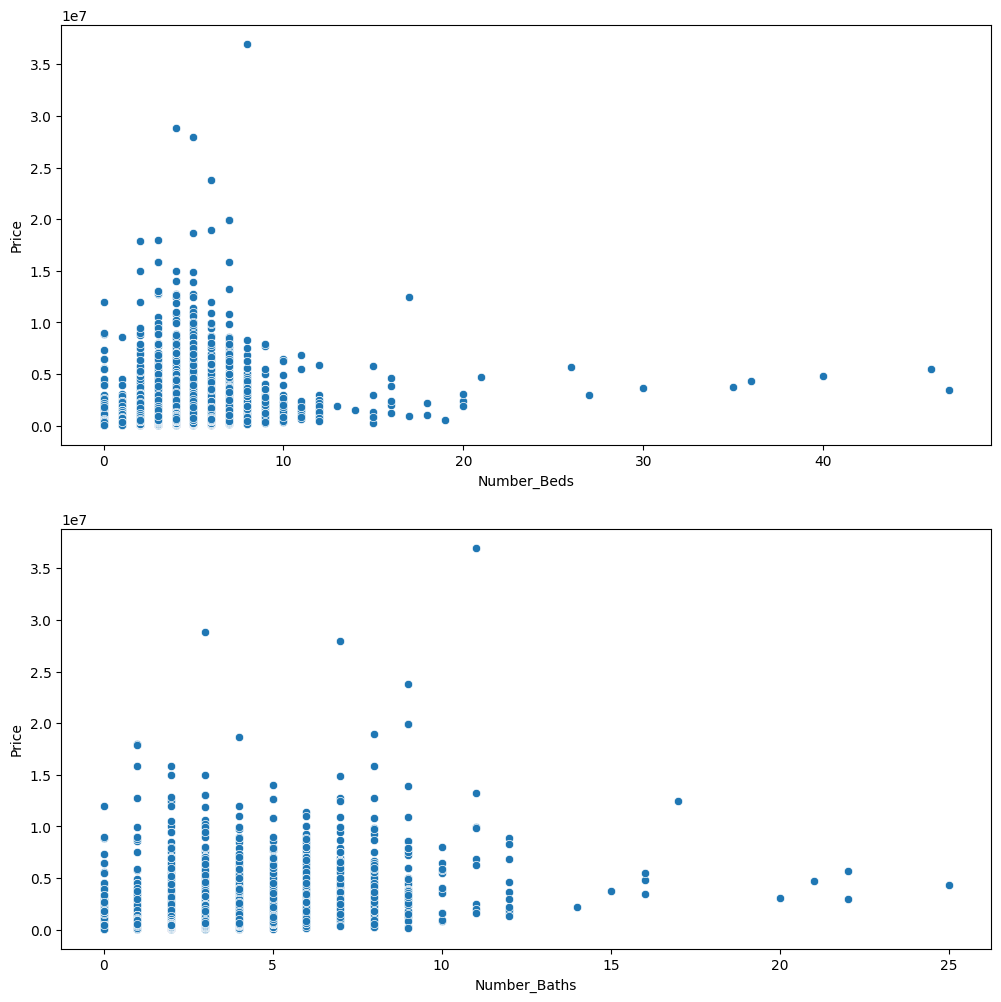

In [8]:
plt.figure(figsize=(12,12))

plt.subplot(211)
sns.scatterplot(x=df["Number_Beds"],y=df["Price"])

plt.subplot(212)
sns.scatterplot(x=df["Number_Baths"],y=df["Price"])
plt.show()

## Even if you make beds and baths extremely large, they will only increase up to a certain point.

# Conclusion
1. White Rock and Vancouver have high prices relative to income.
2. Even if you drastically increase the number of beds and baths, prices will only go up to a certain level.

<a id="feature"></a>

# Feature Detail
1. **City**: City or major metropolitan area within which listings were found. For example, Toronto may include listings from surrounding suburbs such as Markham, Oakville, etc.
2. **Price**: Listed price for the property in Canadian dollars.
3. **Address**: Street address and, where applicable, unit number for the listing.
4. **Number_Beds**: Number of bedrooms mentioned in the listing.
5. **Number_Baths**: Number of bathrooms mentioned in the listing.
6. **Province**: Province in which each city resides. Note, border towns such as Ottawa do not include listings from the surrounding out-of-province cities like Gatineau.
7. **Population**: City population. According to simplemaps (https://simplemaps.com/data/canada-cities)
8. **Longitude / Latitude**: Longitude and Latitude data for individual cities, taken from simpelmaps (https://simplemaps.com/data/canada-cities)
9. **Median_Family_Income**: Median household income for the city taken from the 2021 Canadian census.

### https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities